In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/datasets/hatexplain

fatal: destination path 'hatexplain' already exists and is not an empty directory.


In [ ]:
!pip install datasets==3.6.0


In [ ]:
from datasets import load_dataset

data = load_dataset("hatexplain")

In [ ]:
# print train

print(data['train'])


Dataset({
    features: ['id', 'annotators', 'rationales', 'post_tokens'],
    num_rows: 15383
})


In [ ]:
# print annotators

print(data['train'].features['annotators'])


Sequence(feature={'label': ClassLabel(names=['hatespeech', 'normal', 'offensive'], id=None), 'annotator_id': Value(dtype='int32', id=None), 'target': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}, length=-1, id=None)


In [ ]:
# print the annotators of few exemples

print(data['train'][0]['annotators'])
print(data['train'][1]['annotators'])
print(data['train'][2]['annotators'])


{'label': [0, 2, 2], 'annotator_id': [203, 204, 233], 'target': [['Hindu', 'Islam'], ['Hindu', 'Islam'], ['Hindu', 'Islam', 'Other']]}
{'label': [2, 2, 0], 'annotator_id': [27, 6, 4], 'target': [['Minority', 'Refugee', 'Indian'], ['Indian'], ['Refugee', 'Islam']]}
{'label': [2, 2, 2], 'annotator_id': [209, 203, 222], 'target': [['Other'], ['Hindu'], ['Hindu', 'Other']]}


In [ ]:
# print the post_tokens of few exemples

print(data['train'][0]['post_tokens'])
print(data['train'][1]['post_tokens'])
print(data['train'][2]['post_tokens'])


['u', 'really', 'think', 'i', 'would', 'not', 'have', 'been', 'raped', 'by', 'feral', 'hindu', 'or', 'muslim', 'back', 'in', 'india', 'or', 'bangladesh', 'and', 'a', 'neo', 'nazi', 'would', 'rape', 'me', 'as', 'well', 'just', 'to', 'see', 'me', 'cry']
['the', 'uk', 'has', 'threatened', 'to', 'return', 'radioactive', 'waste', 'to', 'the', 'eu', 'if', 'an', 'agreement', 'cannot', 'be', 'reached', 'can', 'not', 'we', 'keep', 'the', 'radioactive', 'waste', 'and', 'send', 'back', 'all', 'the', 'paki', 'migrants', 'instead']
['if', 'english', 'is', 'not', 'imposition', 'then', 'hindi', 'is', 'also', 'not', 'imposition', 'shut', 'up', 'chutiya', 'retards', 'stophindiimposition']


In [ ]:
import pandas as pd


In [ ]:
# print few example of the hatexplain training dataset in a table

train_df = data["train"]
train_df = train_df.to_pandas()
print(train_df.head())


                            id  \
0                 23107796_gab   
1                  9995600_gab   
2  1227920812235051008_twitter   
3  1204931715778543624_twitter   
4  1179102559241244672_twitter   

                                          annotators  \
0  {'label': [0, 2, 2], 'annotator_id': [203, 204...   
1  {'label': [2, 2, 0], 'annotator_id': [27, 6, 4...   
2  {'label': [2, 2, 2], 'annotator_id': [209, 203...   
3  {'label': [2, 2, 2], 'annotator_id': [235, 222...   
4  {'label': [2, 2, 2], 'annotator_id': [51, 25, ...   

                                          rationales  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...   
4  [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...   

                                         post_tokens  
0  [u, really, think, i, would, not, have, been, ...  
1  [the, uk

In [ ]:
print(data['train'][450]['post_tokens'])


['men', 'who', 'refer', 'to', 'women', 'as', 'females', 'steal']


In [ ]:
from datasets import load_dataset

# Load the HateXplain dataset
dataset = load_dataset("hatexplain")

# Inspect the structure of the 'annotators' field
print(dataset['train']['annotators'][:5])


[{'label': [0, 2, 2], 'annotator_id': [203, 204, 233], 'target': [['Hindu', 'Islam'], ['Hindu', 'Islam'], ['Hindu', 'Islam', 'Other']]}, {'label': [2, 2, 0], 'annotator_id': [27, 6, 4], 'target': [['Minority', 'Refugee', 'Indian'], ['Indian'], ['Refugee', 'Islam']]}, {'label': [2, 2, 2], 'annotator_id': [209, 203, 222], 'target': [['Other'], ['Hindu'], ['Hindu', 'Other']]}, {'label': [2, 2, 2], 'annotator_id': [235, 222, 209], 'target': [['Hindu'], ['Hindu'], ['Hindu']]}, {'label': [2, 2, 2], 'annotator_id': [51, 25, 4], 'target': [['Economic'], ['Economic'], ['Caucasian']]}]


In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
from collections import Counter

# Load the HateXplain dataset
dataset = load_dataset("hatexplain")

# Extract the relevant fields
texts = [' '.join(item) for item in dataset['train']['post_tokens']]  # Combining tokens into a single text

# Extracting the most frequent label from annotators
def most_frequent_label(labels):
    count = Counter(labels)
    return count.most_common(1)[0][0]

labels = [most_frequent_label(item['label']) for item in dataset['train']['annotators']]

# Convert lists to a pandas DataFrame
df = pd.DataFrame({'text': texts, 'label': labels})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['hatespeech', 'normal', 'offensive']))


              precision    recall  f1-score   support

  hatespeech       0.73      0.72      0.72       963
      normal       0.64      0.78      0.71      1243
   offensive       0.57      0.41      0.48       871

    accuracy                           0.66      3077
   macro avg       0.65      0.64      0.64      3077
weighted avg       0.65      0.66      0.65      3077



In [ ]:
pip install accelerate -U


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from collections import Counter

# Load the HateXplain dataset
dataset = load_dataset("hatexplain")

# Prepare the text and labels
texts = [' '.join(item) for item in dataset['train']['post_tokens']]
labels = [max(Counter(item['label']).items(), key=lambda x: x[1])[0] for item in dataset['train']['annotators']]
label_mapping = {0: 'hatespeech', 1: 'normal', 2: 'offensive'}

# Convert to DataFrame
df = pd.DataFrame({'text': texts, 'label': labels})

# Split the dataset and reset indices
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
train_texts = train_texts.reset_index(drop=True)
test_texts = test_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)
test_labels = test_labels.reset_index(drop=True)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128)

# Convert to PyTorch tensors
class HateSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = HateSpeechDataset(train_encodings, train_labels)
test_dataset = HateSpeechDataset(test_encodings, test_labels)

# Load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jerome-ha (long-ha) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,1.073200
20,1.132300
30,1.147100
40,1.136100
50,1.171300
60,1.119100
70,1.057000
80,1.090500
90,1.051100
100,0.991700


{'eval_loss': 1.0199463367462158, 'eval_runtime': 22.0133, 'eval_samples_per_second': 139.779, 'eval_steps_per_second': 17.489, 'epoch': 3.0}


In [ ]:
from sklearn.metrics import classification_report

# Get predictions
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

# Generate classification report
print(classification_report(test_labels, preds, target_names=label_mapping.values()))


              precision    recall  f1-score   support

  hatespeech       0.74      0.80      0.77       963
      normal       0.74      0.72      0.73      1243
   offensive       0.55      0.52      0.53       871

    accuracy                           0.69      3077
   macro avg       0.68      0.68      0.68      3077
weighted avg       0.69      0.69      0.69      3077



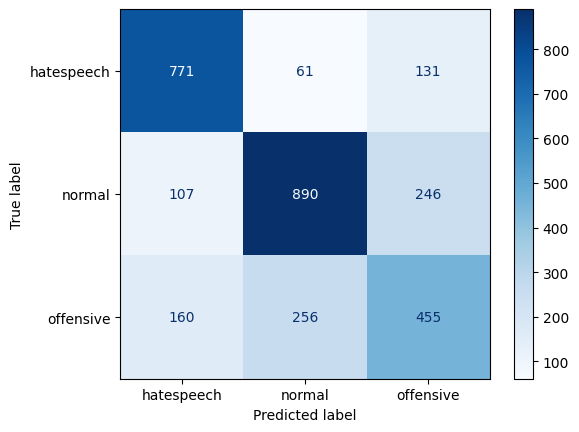

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.values())

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
import pandas as pd

# Assuming you have test_texts, test_labels, and preds
# Convert test data and predictions to a DataFrame for easy manipulation
test_data = pd.DataFrame({
    'text': test_texts,
    'true_label': test_labels,
    'predicted_label': preds
})

# Map numeric labels to string labels
label_mapping = {0: 'hatespeech', 1: 'normal', 2: 'offensive'}

# Function to get examples for each block in the confusion matrix
def print_examples_for_confusion_matrix(df, label_mapping):
    for true_label in range(3):
        for predicted_label in range(3):
            # Filter the DataFrame for the current block
            examples = df[(df['true_label'] == true_label) & (df['predicted_label'] == predicted_label)]

            # Print an example if it exists
            if not examples.empty:
                example_text = examples.iloc[0]['text']
                print(f"True Label: {label_mapping[true_label]}, Predicted Label: {label_mapping[predicted_label]}")
                print(f"Example: {example_text}")
                print("-" * 80)

# Print examples for each block of the confusion matrix
print_examples_for_confusion_matrix(test_data, label_mapping)


True Label: hatespeech, Predicted Label: hatespeech
Example: currynigger and known race traitor <user> has now hit the force unfollow button on me <number> times in the last <number> hours this little freeway shitstain can not pull off even pretending to be pro speech it just wants to cut things into swiss cheese safespace hugboxes for it weakminded little self gab fam
--------------------------------------------------------------------------------
True Label: hatespeech, Predicted Label: normal
Example: <user> <user> so how do you feel about camel jockey and those terms
--------------------------------------------------------------------------------
True Label: hatespeech, Predicted Label: offensive
Example: warning women men boy girls and toddlers all are fair game for rapes and other forms violence from these obama friendly terrorist immigrants
--------------------------------------------------------------------------------
True Label: normal, Predicted Label: hatespeech
Example: ca

In [ ]:
# Reload val set (works since you're on older datasets version)
val_set = load_dataset("hatexplain", split="validation")
subset = val_set.select(range(950, 1050))

# Prepare texts and labels
val_texts = [' '.join(p) for p in subset['post_tokens']]
val_labels = [max(Counter(a['label']).items(), key=lambda x: x[1])[0] for a in subset['annotators']]

# Tokenize
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
val_dataset = HateSpeechDataset(val_encodings, val_labels)

# Evaluate
subset_results = trainer.evaluate(eval_dataset=val_dataset)
print("🔍 Eval on val[950:1050]:", subset_results)


🔍 Eval on val[950:1050]: {'eval_loss': 1.1907607316970825, 'eval_runtime': 0.458, 'eval_samples_per_second': 218.323, 'eval_steps_per_second': 28.382, 'epoch': 3.0}


In [ ]:
import numpy as np
from torch.nn.functional import softmax

model.eval()
preds = []

for i in range(len(val_dataset)):
    item = {k: v.unsqueeze(0).to(model.device) for k, v in val_dataset[i].items() if k != "labels"}
    with torch.no_grad():
        output = model(**item)
    probs = softmax(output.logits, dim=1)
    pred = torch.argmax(probs, dim=1).item()
    preds.append(pred)

# True labels
true_labels = val_labels


✅ Accuracy: 0.6600

📊 Classification Report:
              precision    recall  f1-score   support

  hatespeech       0.67      0.80      0.73        30
      normal       0.69      0.71      0.70        41
   offensive       0.59      0.45      0.51        29

    accuracy                           0.66       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.66      0.65       100



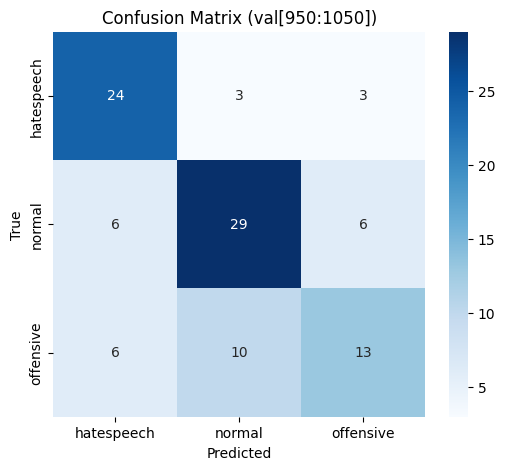

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Label mapping
label_names = ['hatespeech', 'normal', 'offensive']

# Accuracy
acc = accuracy_score(true_labels, preds)
print(f"✅ Accuracy: {acc:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, preds, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (val[950:1050])")
plt.show()


✅ Accuracy: 0.6600

📊 Classification Report:
              precision    recall  f1-score   support

  hatespeech       0.67      0.80      0.73        30
      normal       0.69      0.71      0.70        41
   offensive       0.59      0.45      0.51        29

    accuracy                           0.66       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.66      0.65       100



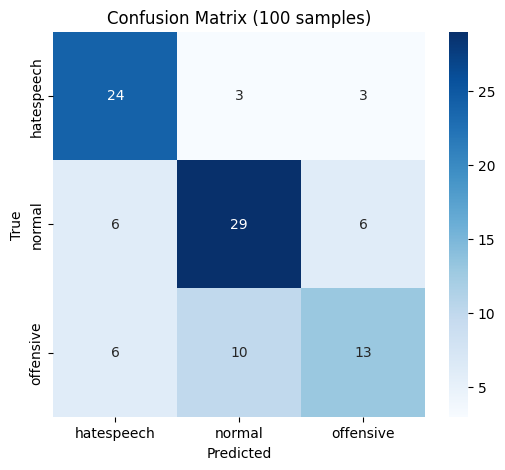

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Label mapping
label_names = ['hatespeech', 'normal', 'offensive']

# Accuracy
acc = accuracy_score(true_labels, preds)
print(f"✅ Accuracy: {acc:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, preds, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (100 samples)")
plt.show()
